### Importing my libraries

In [398]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Problem Statement

## Does living in a certain region of the country affect the overall SAT participation rate and test scores?

### Required coding challenges

- The creating of a function to strip string and convert to float is used below during my data cleaning

In [593]:
# function for mean

def man_mean(sample):
    return sum(sample) / len(sample)


In [585]:
man_mean(range(100))

49.5

In [586]:
man_mean(range(250))

124.5

In [592]:
np.mean(range(250))

124.5

In [594]:
# function for Std Deviation

def std_dev(data):
    n = len(data)
    mean = sum(data) / n
    var = sum((x - mean)**2 for x in data) / n
    std_dev = var ** 0.5
    return std_dev


In [590]:
std_dev(range(250))

72.16820629612461

In [591]:
np.std(range(250))

72.16820629612461

### Importing my files

In [595]:
file_path1 = '../data/sat_2017.csv'
sat2017 = pd.read_csv(file_path1)

file_path2 = '../data/sat_2018.csv'
sat2018 = pd.read_csv(file_path2)

file_path3 = '../data/sat_2019.csv'
sat2019 = pd.read_csv(file_path3)

# The sat2020 file I downloaded online and uploaded it to my data folder. Source cited at very bottom 

file_path4 = '../data/sat_2020.csv'
sat2020 = pd.read_csv(file_path4)

#### These are the regions I will separate my data into

In [353]:
northeast =  ['Maine', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New Hampshire', 'Vermont', 'New York', 'Pennsylvania', 'New Jersey', 'Delaware', 'Maryland', 'District of Columbia']



In [354]:
southeast =  ['West Virginia', 'Virginia', 'Kentucky', 'Tennessee', 'North Carolina', 'South Carolina', 'Georgia', 'Alabama', 'Mississippi', 'Arkansas', 'Louisiana', 'Florida']



In [355]:
midwest = ['Ohio', 'Indiana', 'Michigan', 'Illinois', 'Missouri', 'Wisconsin', 'Minnesota', 'Iowa', 'Kansas', 'Nebraska', 'South Dakota', 'North Dakota']



In [356]:
southwest = ['Texas', 'Oklahoma', 'New Mexico', 'Arizona']


In [357]:
west = ['Colorado', 'Wyoming', 'Montana', 'Idaho', 'Washington', 'Oregon', 'Utah', 'Nevada', 'California', 'Alaska', 'Hawaii']



#### Beginning data cleaning by cleaning up the columns in preparation for merging
- I am separating each dataset by the year
- I am also changing column names to be more uniform

In [289]:
cols = ['state', 'participation', 'ebrw', 'math', 'total']

sat2017.columns = cols

sat2017.columns = ['state', 'participation_2017', 'ebrw_2017', 'math_2017', 'total_2017']


In [290]:
sat2018.columns = cols

sat2018.columns = ['state', 'participation_2018', 'ebrw_2018', 'math_2018', 'total_2018']

- I have dropped the 39th and 47th rows in my 2019 and 2020 dataset that represent Puerto Rico and Virgin islands as they are not necessary for my particular analysis.
- I have also commented out those line as I don't want the new lines to be dropped in case I run the block again

In [294]:
sat2019.columns = cols
sat2019.columns = ['state', 'participation_2019', 'ebrw_2019', 'math_2019', 'total_2019']
# sat2019 = sat2019.drop(sat2019.index[[39, 47]])

sat2019.head()

,state,participation_2019,ebrw_2019,math_2019,total_2019
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [297]:
sat2020.columns = cols
sat2020.columns = ['state', 'participation_2020', 'ebrw_2020', 'math_2020', 'total_2020']
# sat2020 = sat2020.drop(sat2020.index[[39, 47]])

sat2020.head()

,state,participation_2020,ebrw_2020,math_2020,total_2020
0,Alabama,7%,576,551,1127
1,Alaska,37%,555,543,1098
2,Arizona,29%,571,568,1139
3,Arkansas,4%,590,567,1157
4,California,67%,527,522,1049


### I have created 2 functions for use in cleaning of columns
- The first function will strip all instances of "%" within given dataframe
- The second function will take a given column and float the number and divide by 100 to give our percentage

In [298]:
def strip_df(df):
    df = df.applymap(lambda x: x.rstrip('%') if isinstance(x, str) else x)
    return df

def convert_flt(col):
    col = [float(x) / 100 for x in col]
    return col

In [299]:
sat2017 = strip_df(sat2017)

#### After converting my desired columns to floats, I have commented out the line of code so I dont accidently run it again and further divide by 100

In [300]:
# sat2017['participation_2017'] = convert_flt(sat2017['participation_2017'])

In [301]:
sat2017.head()

,state,participation_2017,ebrw_2017,math_2017,total_2017
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [302]:
sat2018 = strip_df(sat2018)

In [303]:
# sat2018['participation_2018'] = convert_flt(sat2018['participation_2018'])

In [304]:
sat2018.head()

,state,participation_2018,ebrw_2018,math_2018,total_2018
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


In [305]:
sat2019 = strip_df(sat2019)

In [307]:
# sat2019['participation_2019'] = convert_flt(sat2019['participation_2019'])

In [308]:
sat2019.head()

,state,participation_2019,ebrw_2019,math_2019,total_2019
0,Alabama,0.07,583,560,1143
1,Alaska,0.41,556,541,1097
2,Arizona,0.31,569,565,1134
3,Arkansas,0.06,582,559,1141
4,California,0.63,534,531,1065


In [313]:
sat2020 = strip_df(sat2020)

In [314]:
# sat2020['participation_2020'] = convert_flt(sat2020['participation_2020'])

In [315]:
sat2020.head()

,state,participation_2020,ebrw_2020,math_2020,total_2020
0,Alabama,0.07,576,551,1127
1,Alaska,0.37,555,543,1098
2,Arizona,0.29,571,568,1139
3,Arkansas,0.04,590,567,1157
4,California,0.67,527,522,1049


#### Once all my datasets have been cleaned I merge them all into one dataframe for ease of analysis

In [338]:
sat20172018 = pd.merge(sat2017, sat2018, on='state')

In [339]:
sat20192020 = pd.merge(sat2019, sat2020, on='state')

In [340]:
sat_all_years = pd.merge(sat20172018, sat20192020, on='state')

In [371]:
sat_all_years.head()

,state,participation_2017,ebrw_2017,math_2017,total_2017,participation_2018,ebrw_2018,math_2018,total_2018,participation_2019,ebrw_2019,math_2019,total_2019,participation_2020,ebrw_2020,math_2020,total_2020
0,Alabama,0.05,593,572,1165,0.06,595,571,1166,0.07,583,560,1143,0.07,576,551,1127
1,Alaska,0.38,547,533,1080,0.43,562,544,1106,0.41,556,541,1097,0.37,555,543,1098
2,Arizona,0.30,563,553,1116,0.29,577,572,1149,0.31,569,565,1134,0.29,571,568,1139
3,Arkansas,0.03,614,594,1208,0.05,592,576,1169,0.06,582,559,1141,0.04,590,567,1157
4,California,0.53,531,524,1055,0.60,540,536,1076,0.63,534,531,1065,0.67,527,522,1049


In [598]:
sat_all_years.dtypes

state                  object
participation_2017    float64
ebrw_2017               int64
math_2017               int64
total_2017              int64
participation_2018    float64
ebrw_2018               int64
math_2018               int64
total_2018              int64
participation_2019    float64
ebrw_2019               int64
math_2019               int64
total_2019              int64
participation_2020    float64
ebrw_2020               int64
math_2020               int64
total_2020              int64
dtype: object

#### Saving my dataset to my repository

In [583]:
sat_all_years.to_csv('sat_all_years', index=False)

### I begin exploratory data analysis in search of patterns within the data 

In [410]:
sat_all_years.describe()

,participation_2017,ebrw_2017,math_2017,total_2017,participation_2018,ebrw_2018,math_2018,total_2018,participation_2019,ebrw_2019,math_2019,total_2019,participation_2020,ebrw_2020,math_2020,total_2020
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,547.627451,1126.098039,0.457451,563.686275,556.235294,1120.019608,0.490588,560.803922,552.196078,1113.078431,0.487059,554.901961,545.549020,1100.352941
std,0.352766,45.666901,84.909119,92.494812,0.373143,47.502627,47.772623,94.155083,0.387476,46.248035,51.290553,97.197910,0.389262,42.780488,46.898321,89.244344
min,0.020000,482.000000,52.000000,950.000000,0.020000,480.000000,480.000000,977.000000,0.020000,483.000000,460.000000,943.000000,0.020000,480.000000,456.000000,936.000000
25%,0.040000,533.500000,522.000000,1055.500000,0.045000,534.500000,522.500000,1057.500000,0.055000,527.500000,511.500000,1038.000000,0.045000,523.000000,505.000000,1027.500000
50%,0.380000,559.000000,548.000000,1107.000000,0.520000,552.000000,544.000000,1098.000000,0.540000,550.000000,546.000000,1097.000000,0.510000,549.000000,543.000000,1095.000000
75%,0.660000,613.000000,599.000000,1212.000000,0.775000,610.500000,593.500000,1204.000000,0.820000,612.000000,599.000000,1210.000000,0.850000,599.500000,586.000000,1185.500000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,643.000000,655.000000,1298.000000,1.000000,636.000000,648.000000,1284.000000,1.000000,624.000000,633.000000,1257.000000


#### Here I have made subsets of my values separated by the regions I specified earlier

In [363]:
northeast_sat = sat_all_years[sat_all_years.state.isin(northeast)]
southeast_sat = sat_all_years[sat_all_years.state.isin(southeast)]
midwest_sat = sat_all_years[sat_all_years.state.isin(midwest)]
southwest_sat = sat_all_years[sat_all_years.state.isin(southwest)]
west_sat = sat_all_years[sat_all_years.state.isin(west)]


In [366]:
northeast_sat.describe()

,participation_2017,ebrw_2017,math_2017,total_2017,participation_2018,ebrw_2018,math_2018,total_2018,participation_2019,ebrw_2019,math_2019,total_2019,participation_2020,ebrw_2020,math_2020,total_2020
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0000
mean,0.807500,529.166667,479.083333,1047.750000,0.862500,533.083333,524.750000,1057.916667,0.873333,528.750000,520.583333,1049.416667,0.875000,525.916667,516.166667,1042.0000
std,0.159153,21.716493,136.525361,45.180698,0.126428,22.014286,25.726269,47.513555,0.122202,22.193877,25.868402,47.917464,0.132973,22.439650,26.425997,48.6621
min,0.600000,482.000000,52.000000,950.000000,0.640000,497.000000,480.000000,977.000000,0.660000,495.000000,480.000000,975.000000,0.630000,497.000000,481.000000,978.0000
25%,0.685000,524.250000,497.250000,1033.750000,0.782500,512.750000,504.000000,1016.750000,0.805000,509.750000,499.500000,1008.500000,0.797500,503.250000,490.500000,993.7500
50%,0.735000,531.000000,521.500000,1054.000000,0.870000,535.000000,531.000000,1065.500000,0.880000,532.000000,524.500000,1058.500000,0.905000,527.500000,518.000000,1047.0000
75%,0.970000,539.250000,527.250000,1064.250000,0.975000,547.000000,541.000000,1088.000000,0.992500,544.250000,539.000000,1084.000000,1.000000,541.500000,535.500000,1078.7500
max,1.000000,562.000000,551.000000,1114.000000,1.000000,565.000000,563.000000,1125.000000,1.000000,560.000000,561.000000,1120.000000,1.000000,560.000000,559.000000,1119.0000


In [367]:
southeast_sat.describe()

,participation_2017,ebrw_2017,math_2017,total_2017,participation_2018,ebrw_2018,math_2018,total_2018,participation_2019,ebrw_2019,math_2019,total_2019,participation_2020,ebrw_2020,math_2020,total_2020
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.287500,580.750000,559.666667,1140.666667,0.297500,579.916667,562.166667,1142.250000,0.407500,568.750000,549.583333,1118.500000,0.397500,563.000000,542.833333,1105.750000
std,0.303139,41.165133,41.319890,82.600169,0.281073,39.654091,40.489804,79.799892,0.392524,46.487779,49.958998,96.243536,0.388286,42.239576,45.586747,87.621215
min,0.020000,520.000000,497.000000,1017.000000,0.030000,513.000000,486.000000,999.000000,0.030000,483.000000,460.000000,943.000000,0.030000,480.000000,456.000000,936.000000
25%,0.040000,545.250000,526.250000,1076.750000,0.047500,549.250000,538.000000,1091.000000,0.057500,535.000000,515.250000,1051.000000,0.047500,533.750000,512.750000,1046.250000
50%,0.095000,577.000000,556.500000,1133.500000,0.170000,579.500000,560.500000,1141.500000,0.290000,574.500000,555.000000,1130.000000,0.275000,571.500000,550.000000,1121.500000
75%,0.527500,616.250000,596.500000,1213.000000,0.552500,617.250000,597.750000,1215.250000,0.687500,612.000000,593.750000,1205.000000,0.680000,598.000000,576.000000,1174.000000
max,0.830000,634.000000,616.000000,1247.000000,0.700000,630.000000,618.000000,1248.000000,1.000000,628.000000,612.000000,1237.000000,1.000000,610.000000,598.000000,1207.000000


In [368]:
midwest_sat.describe()

,participation_2017,ebrw_2017,math_2017,total_2017,participation_2018,ebrw_2018,math_2018,total_2018,participation_2019,ebrw_2019,math_2019,total_2019,participation_2020,ebrw_2020,math_2020,total_2020
count,12.000000,12.00000,12.000000,12.00000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.172500,605.25000,599.666667,1205.00000,0.255000,599.416667,597.250000,1196.833333,0.259167,594.166667,595.250000,1189.333333,0.257500,583.250000,583.333333,1166.333333
std,0.311773,46.41145,50.027871,95.91663,0.385876,53.037651,58.526024,111.341272,0.390162,51.066504,57.018538,108.070964,0.384616,47.478464,51.133219,98.333693
min,0.020000,509.00000,495.000000,1005.00000,0.020000,511.000000,499.000000,1011.000000,0.020000,507.000000,496.000000,1003.000000,0.020000,503.000000,495.000000,998.000000
25%,0.030000,573.25000,566.500000,1140.50000,0.030000,549.500000,543.250000,1092.750000,0.030000,548.250000,545.250000,1092.750000,0.030000,539.000000,534.000000,1073.000000
50%,0.030000,630.50000,623.000000,1254.50000,0.040000,631.000000,626.000000,1257.000000,0.040000,622.000000,622.500000,1242.500000,0.040000,610.500000,609.500000,1219.000000
75%,0.097500,640.25000,632.000000,1272.00000,0.292500,635.500000,634.000000,1269.500000,0.307500,629.250000,635.250000,1264.250000,0.317500,615.000000,617.750000,1232.500000
max,1.000000,644.00000,651.000000,1295.00000,1.000000,643.000000,655.000000,1298.000000,1.000000,636.000000,648.000000,1284.000000,1.000000,624.000000,633.000000,1257.000000


In [369]:
southwest_sat.describe()

,participation_2017,ebrw_2017,math_2017,total_2017,participation_2018,ebrw_2018,math_2018,total_2018,participation_2019,ebrw_2019,math_2019,total_2019,participation_2020,ebrw_2020,math_2020,total_2020
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.275000,545.750000,534.500000,1080.250000,0.297500,547.500000,536.250000,1084.000000,0.347500,529.25000,518.500000,1048.000000,0.352500,526.000000,517.750000,1043.750000
std,0.250932,29.409466,26.501572,55.823382,0.256694,23.727621,26.537709,49.979996,0.228236,34.21866,39.110953,72.851447,0.255653,34.765884,37.455529,72.182061
min,0.070000,513.000000,507.000000,1020.000000,0.080000,520.000000,512.000000,1032.000000,0.180000,490.00000,472.000000,963.000000,0.190000,490.000000,481.000000,971.000000
25%,0.100000,525.750000,514.500000,1040.250000,0.140000,535.750000,518.750000,1054.500000,0.210000,508.75000,498.250000,1007.250000,0.197500,505.000000,495.250000,1000.250000
50%,0.205000,546.500000,535.000000,1081.500000,0.225000,546.500000,530.500000,1077.500000,0.265000,529.00000,518.500000,1047.500000,0.245000,521.500000,511.000000,1032.500000
75%,0.380000,566.500000,555.000000,1121.500000,0.382500,558.250000,548.000000,1107.000000,0.402500,549.50000,538.750000,1088.250000,0.400000,542.500000,533.500000,1076.000000
max,0.620000,577.000000,561.000000,1138.000000,0.660000,577.000000,572.000000,1149.000000,0.680000,569.00000,565.000000,1134.000000,0.730000,571.000000,568.000000,1139.000000


In [428]:
west_sat.describe()

,participation_2017,ebrw_2017,math_2017,total_2017,participation_2018,ebrw_2018,math_2018,total_2018,participation_2019,ebrw_2019,math_2019,total_2019,participation_2020,ebrw_2020,math_2020,total_2020
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,0.362727,569.090909,557.272727,1126.272727,0.469091,546.272727,546.636364,1092.818182,0.468182,562.181818,554.818182,1117.090909,0.460909,557.272727,549.454545,1106.727273
std,0.288343,39.406737,38.340816,77.709833,0.347835,48.437776,37.270022,82.567328,0.353010,38.868543,41.753606,80.589645,0.358537,37.424834,39.525596,76.823292
min,0.030000,513.000000,493.000000,1005.000000,0.030000,480.000000,493.000000,1001.000000,0.030000,505.000000,488.000000,993.000000,0.020000,500.000000,484.000000,984.000000
25%,0.105000,542.500000,533.500000,1077.500000,0.165000,513.500000,530.000000,1017.500000,0.145000,536.500000,533.000000,1069.500000,0.135000,533.000000,528.000000,1061.000000
50%,0.380000,560.000000,548.000000,1108.000000,0.480000,543.000000,538.000000,1081.000000,0.510000,556.000000,550.000000,1100.000000,0.510000,555.000000,546.000000,1098.000000
75%,0.540000,605.500000,593.000000,1198.500000,0.645000,569.000000,559.500000,1128.500000,0.665000,591.500000,586.000000,1177.500000,0.680000,588.500000,579.000000,1167.500000
max,0.930000,626.000000,614.000000,1238.000000,1.000000,633.000000,625.000000,1257.000000,1.000000,623.000000,615.000000,1238.000000,1.000000,614.000000,606.000000,1220.000000


In [400]:
sat_all_years.corr()

,participation_2017,ebrw_2017,math_2017,total_2017,participation_2018,ebrw_2018,math_2018,total_2018,participation_2019,ebrw_2019,math_2019,total_2019,participation_2020,ebrw_2020,math_2020,total_2020
participation_2017,1.000000,-0.874326,-0.566558,-0.867540,0.874763,-0.666313,-0.686941,-0.684556,0.844118,-0.700507,-0.673190,-0.688327,0.845072,-0.681283,-0.670152,-0.678242
ebrw_2017,-0.874326,1.000000,0.628405,0.996661,-0.818925,0.814096,0.865909,0.849798,-0.838622,0.898352,0.876606,0.889820,-0.839936,0.881483,0.867700,0.877970
math_2017,-0.566558,0.628405,1.000000,0.632648,-0.528102,0.487915,0.537222,0.518742,-0.554627,0.562127,0.564127,0.565106,-0.572696,0.576438,0.588346,0.585069
total_2017,-0.867540,0.996661,0.632648,1.000000,-0.806796,0.810068,0.875601,0.852727,-0.836916,0.903106,0.892973,0.900690,-0.837892,0.886240,0.884928,0.889299
participation_2018,0.874763,-0.818925,-0.528102,-0.806796,1.000000,-0.762055,-0.791338,-0.785926,0.952967,-0.795342,-0.751634,-0.774900,0.951339,-0.786248,-0.750397,-0.770739
ebrw_2018,-0.666313,0.814096,0.487915,0.810068,-0.762055,1.000000,0.954661,0.988560,-0.789814,0.865572,0.831921,0.850434,-0.787894,0.861166,0.827409,0.846946
math_2018,-0.686941,0.865909,0.537222,0.875601,-0.791338,0.954661,1.000000,0.988622,-0.835846,0.940199,0.933717,0.939734,-0.834901,0.934868,0.929681,0.936126
total_2018,-0.684556,0.849798,0.518742,0.852727,-0.785926,0.988560,0.988622,1.000000,-0.822584,0.913307,0.893029,0.905423,-0.821160,0.908491,0.888818,0.901945
participation_2019,0.844118,-0.838622,-0.554627,-0.836916,0.952967,-0.789814,-0.835846,-0.822584,1.000000,-0.873453,-0.845841,-0.861786,0.998541,-0.868604,-0.849700,-0.862162
ebrw_2019,-0.700507,0.898352,0.562127,0.903106,-0.795342,0.865572,0.940199,0.913307,-0.873453,1.000000,0.986026,0.996134,-0.874517,0.992665,0.979499,0.989842


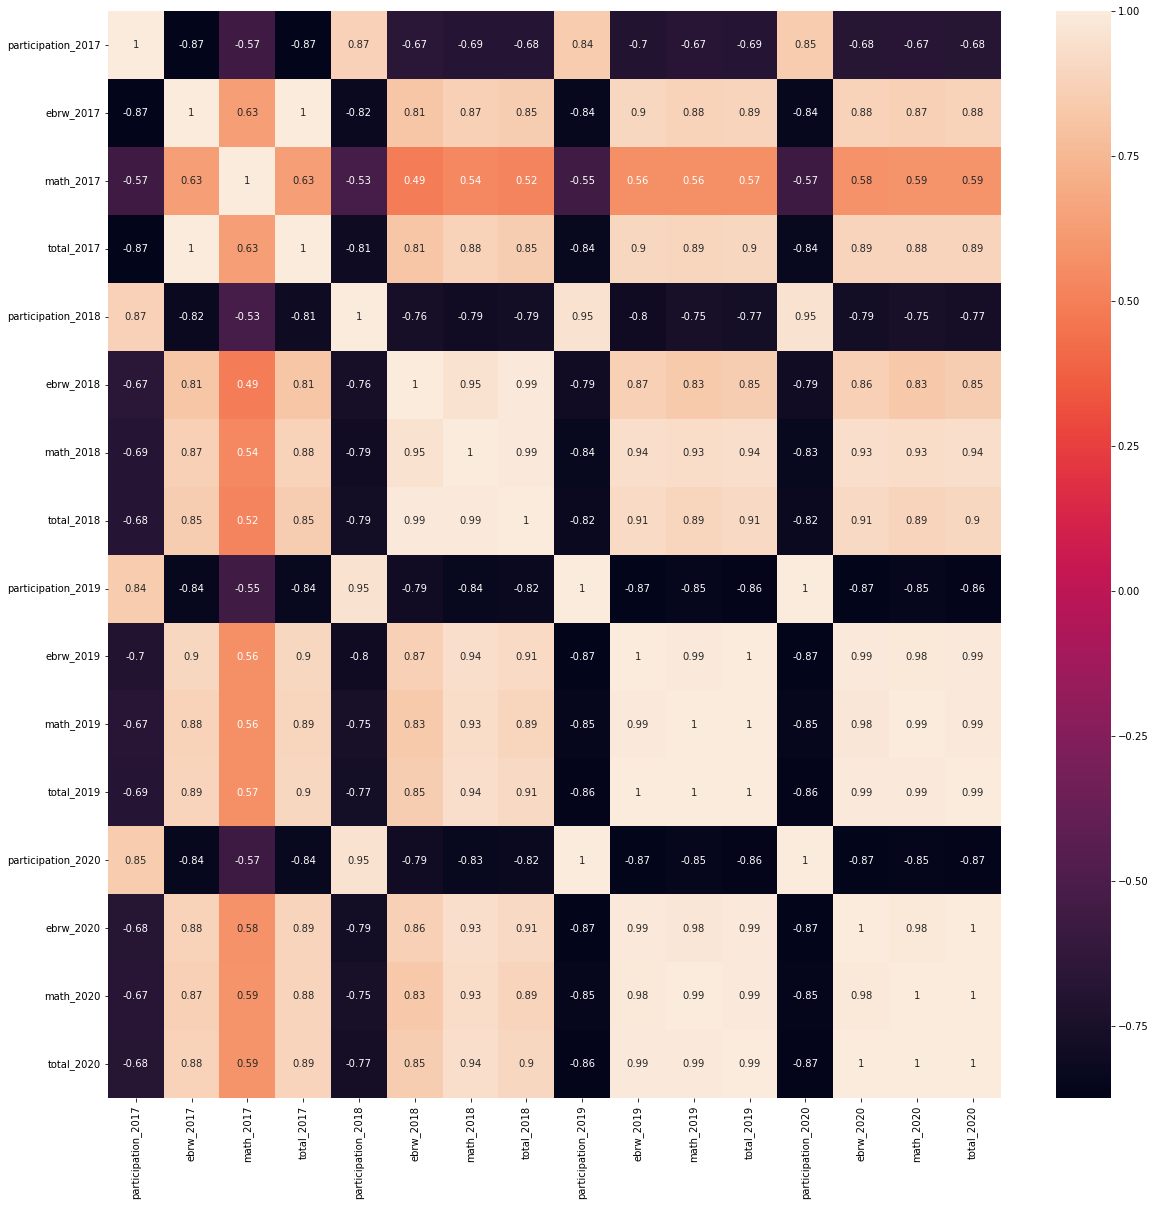

In [399]:
plt.figure(figsize=(20, 20))
sns.heatmap(sat_all_years.corr(),
           annot=True);

## I begin plotting data to derive insights as well as for use in my presentation

''

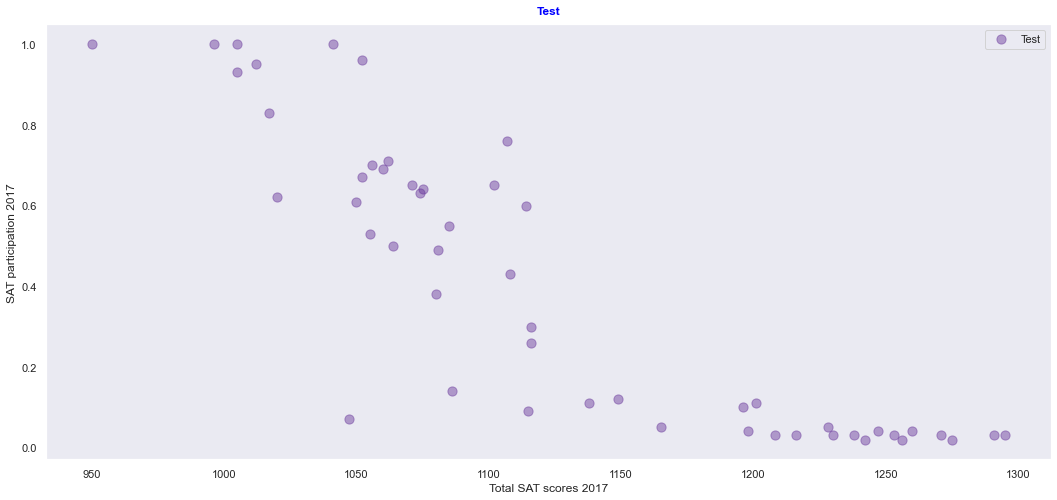

In [581]:
fig, ax = plt.subplots(1,1, figsize=(18, 8))


# plots
# scatter
ax.scatter(sat_all_years['total_2017'], sat_all_years['participation_2017'],
                color='rebeccapurple',
                alpha = 0.45,
                s=85,
                label='Test',
                )


ax.legend()



# fluff
ax.set_xlabel('Total SAT scores 2017')
ax.set_ylabel('SAT participation 2017')

# ax.set_ylabel('MEDV')
ax.set_title('Test',
            fontdict=dict(fontsize=12,
            fontweight='bold',
            color='blue'),
            pad=10)
;

##### Above: Testing scatterplots for use later

''

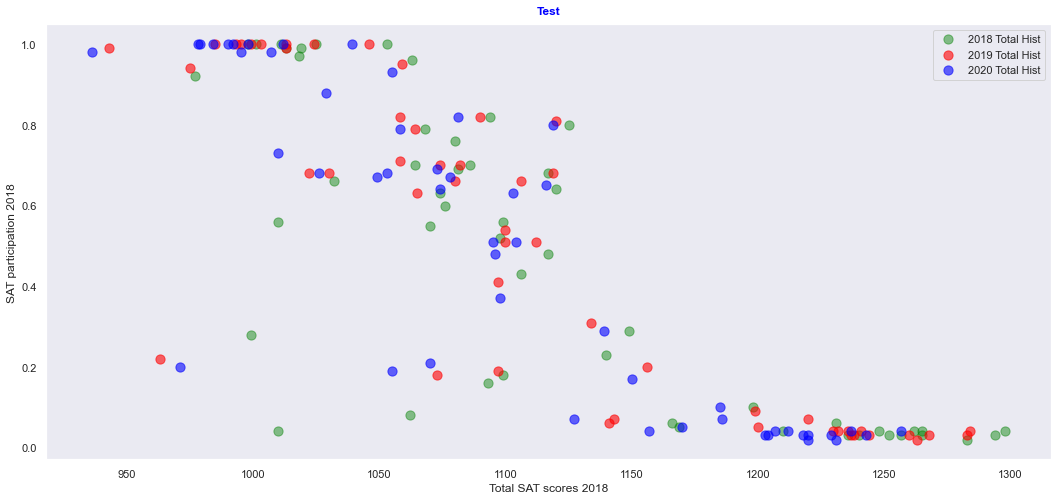

In [582]:
fig, ax = plt.subplots(1,1, figsize=(18, 8))


# plots
# scatter
ax.scatter(sat_all_years['total_2018'], sat_all_years['participation_2018'],
                color='green',
                alpha = 0.45,
                s=85,
                label='2018 Total Hist',
                )

ax.scatter(sat_all_years['total_2019'], sat_all_years['participation_2019'],
                color='red',
                alpha = 0.60,
                s=85,
                label='2019 Total Hist',
                )


ax.scatter(sat_all_years['total_2020'], sat_all_years['participation_2020'],
                color='blue',
                alpha = 0.60,
                s=85,
                label='2020 Total Hist',
                )


ax.legend()



# fluff
ax.set_xlabel('Total SAT scores 2018')
ax.set_ylabel('SAT participation 2018')

# ax.set_ylabel('MEDV')
ax.set_title('Test',
            fontdict=dict(fontsize=12,
            fontweight='bold',
            color='blue'),
            pad=10)
;

No handles with labels found to put in legend.


''

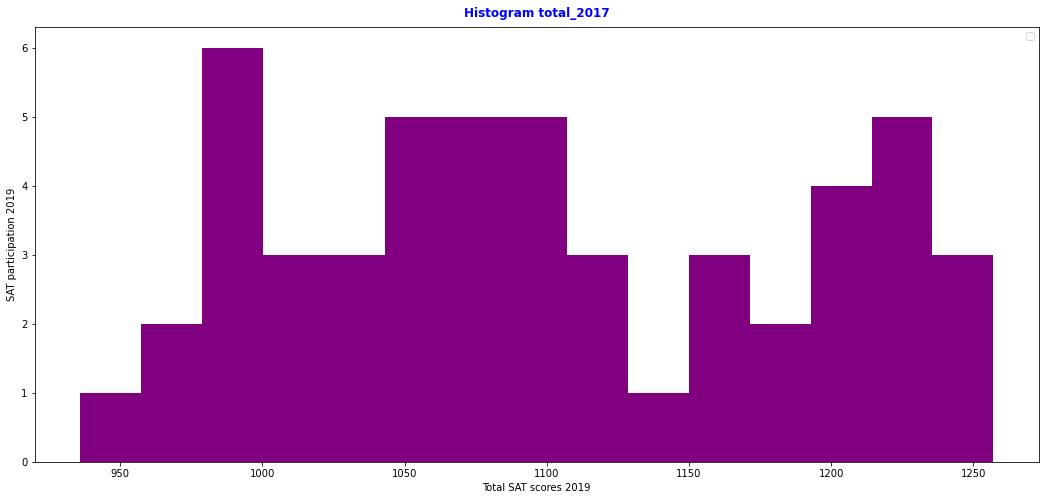

In [421]:
fig, ax = plt.subplots(1,1, figsize=(18, 8))


ax.hist(sat_all_years['total_2020'],
                color='purple',
                bins=15)

ax.legend()



# fluff
ax.set_xlabel('Total SAT scores 2019')
ax.set_ylabel('SAT participation 2019')

# ax.set_ylabel('MEDV')
ax.set_title('Histogram total_2017',
            fontdict=dict(fontsize=12,
            fontweight='bold',
            color='blue'),
            pad=10)
;

##### Above: Testing histograms to look for apparent trends in distribution

''

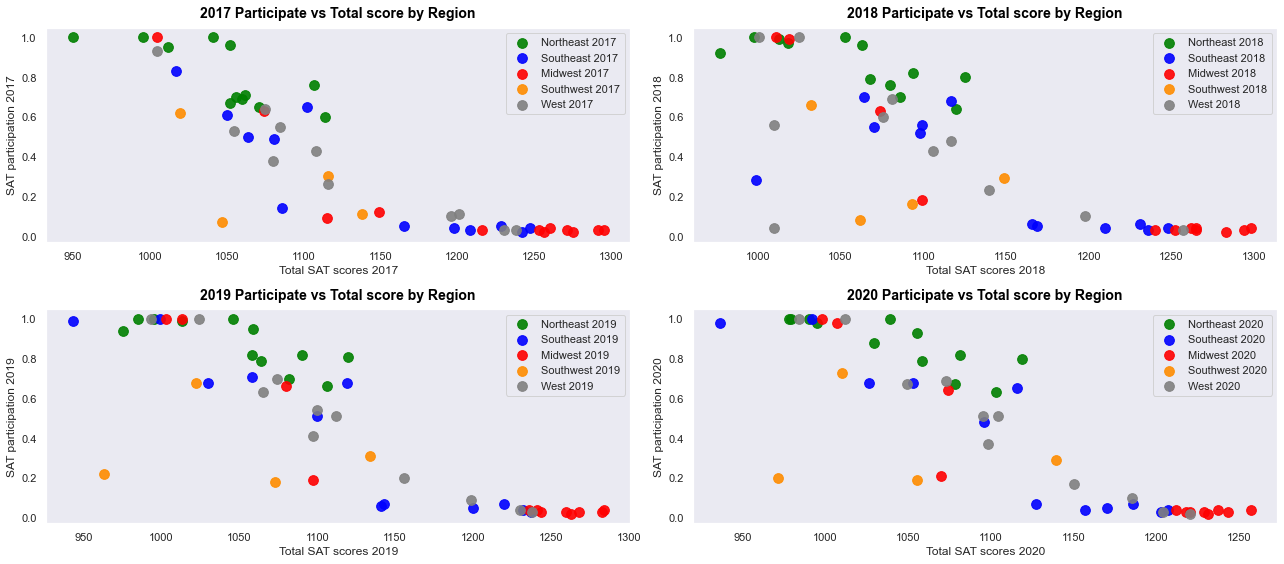

In [579]:
fig, ax = plt.subplots(2,2, figsize=(18, 8))


ax[0][0].scatter(northeast_sat['total_2017'], northeast_sat['participation_2017'],
                color='green',
                alpha = 0.90,
                s=95,
                label='Northeast 2017',
                )

ax[0][0].scatter(southeast_sat['total_2017'], southeast_sat['participation_2017'],
                color='blue',
                alpha = 0.90,
                s=95,
                label='Southeast 2017',
                )


ax[0][0].scatter(midwest_sat['total_2017'], midwest_sat['participation_2017'],
                color='red',
                alpha = 0.90,
                s=95,
                label='Midwest 2017',
                )

ax[0][0].scatter(southwest_sat['total_2017'], southwest_sat['participation_2017'],
                color='darkorange',
                alpha = 0.90,
                s=95,
                label='Southwest 2017',
                )
ax[0][0].scatter(west_sat['total_2017'], west_sat['participation_2017'],
                color='gray',
                alpha = 0.90,
                s=95,
                label='West 2017',
                )

ax[0][0].legend()

ax[0][1].scatter(northeast_sat['total_2018'], northeast_sat['participation_2018'],
                color='green',
                alpha = 0.90,
                s=95,
                label='Northeast 2018',
                )

ax[0][1].scatter(southeast_sat['total_2018'], southeast_sat['participation_2018'],
                color='blue',
                alpha = 0.90,
                s=95,
                label='Southeast 2018',
                )


ax[0][1].scatter(midwest_sat['total_2018'], midwest_sat['participation_2018'],
                color='red',
                alpha = 0.90,
                s=95,
                label='Midwest 2018',
                )

ax[0][1].scatter(southwest_sat['total_2018'], southwest_sat['participation_2018'],
                color='darkorange',
                alpha = 0.90,
                s=95,
                label='Southwest 2018',
                )
ax[0][1].scatter(west_sat['total_2018'], west_sat['participation_2018'],
                color='gray',
                alpha = 0.90,
                s=95,
                label='West 2018',
                )

ax[0][1].legend()

ax[1][0].scatter(northeast_sat['total_2019'], northeast_sat['participation_2019'],
                color='green',
                alpha = 0.90,
                s=95,
                label='Northeast 2019',
                )

ax[1][0].scatter(southeast_sat['total_2019'], southeast_sat['participation_2019'],
                color='blue',
                alpha = 0.90,
                s=95,
                label='Southeast 2019',
                )


ax[1][0].scatter(midwest_sat['total_2019'], midwest_sat['participation_2019'],
                color='red',
                alpha = 0.90,
                s=95,
                label='Midwest 2019',
                )

ax[1][0].scatter(southwest_sat['total_2019'], southwest_sat['participation_2019'],
                color='darkorange',
                alpha = 0.90,
                s=95,
                label='Southwest 2019',
                )
ax[1][0].scatter(west_sat['total_2019'], west_sat['participation_2019'],
                color='gray',
                alpha = 0.90,
                s=95,
                label='West 2019',
                )

ax[1][0].legend()

ax[1][1].scatter(northeast_sat['total_2020'], northeast_sat['participation_2020'],
                color='green',
                alpha = 0.90,
                s=95,
                label='Northeast 2020',
                )

ax[1][1].scatter(southeast_sat['total_2020'], southeast_sat['participation_2020'],
                color='blue',
                alpha = 0.90,
                s=95,
                label='Southeast 2020',
                )


ax[1][1].scatter(midwest_sat['total_2020'], midwest_sat['participation_2020'],
                color='red',
                alpha = 0.90,
                s=95,
                label='Midwest 2020',
                )

ax[1][1].scatter(southwest_sat['total_2020'], southwest_sat['participation_2020'],
                color='darkorange',
                alpha = 0.90,
                s=95,
                label='Southwest 2020',
                )
ax[1][1].scatter(west_sat['total_2020'], west_sat['participation_2020'],
                color='gray',
                alpha = 0.90,
                s=95,
                label='West 2020',
                )

ax[1][1].legend()

# fluff
ax[0][0].set_xlabel('Total SAT scores 2017')
ax[0][0].set_ylabel('SAT participation 2017')
ax[0][0].set_title('2017 Participate vs Total score by Region',
            fontdict=dict(fontsize=14,
            fontweight='black',
            color='black'),
            pad=10)

ax[0][1].set_xlabel('Total SAT scores 2018')
ax[0][1].set_ylabel('SAT participation 2018')
ax[0][1].set_title('2018 Participate vs Total score by Region',
            fontdict=dict(fontsize=14,
            fontweight='black',
            color='black'),
            pad=10)
ax[1][0].set_xlabel('Total SAT scores 2019')
ax[1][0].set_ylabel('SAT participation 2019')
ax[1][0].set_title('2019 Participate vs Total score by Region',
            fontdict=dict(fontsize=14,
            fontweight='black',
            color='black'),
            pad=10)
ax[1][1].set_xlabel('Total SAT scores 2020')
ax[1][1].set_ylabel('SAT participation 2020')
ax[1][1].set_title('2020 Participate vs Total score by Region',
            fontdict=dict(fontsize=14,
            fontweight='black',
            color='black'),
            pad=10)

plt.tight_layout()
;

###### Above: Main scatterplots I will use for presentation. Across all 4 years we see correlation of higher participation results in lower overall test scores. This holds true throughout all regions of the US.

''

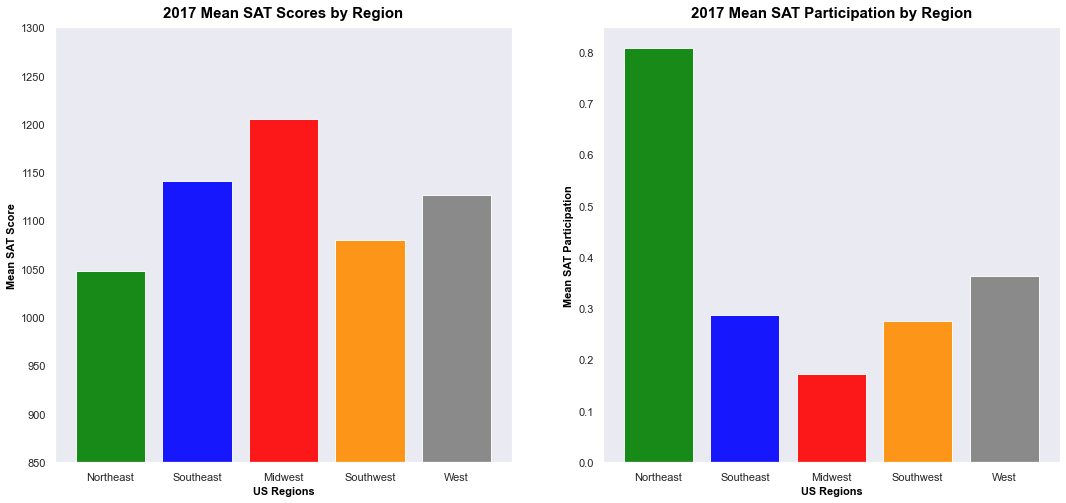

In [560]:
region_means = [northeast_sat['total_2017'].mean(), southeast_sat['total_2017'].mean(), midwest_sat['total_2017'].mean(), southwest_sat['total_2017'].mean(), west_sat['total_2017'].mean()]
region_names = ['Northeast', 'Southeast', 'Midwest', 'Southwest', 'West']
region_part = [northeast_sat['participation_2017'].mean(), southeast_sat['participation_2017'].mean(), midwest_sat['participation_2017'].mean(), southwest_sat['participation_2017'].mean(), west_sat['participation_2017'].mean()]

fig, ax = plt.subplots(1,2, figsize=(18, 8), squeeze=False)
sns.set_style('dark')

# plt.bar(x_pos, height, color=['black', 'red', 'green', 'blue', 'cyan'])
ax[0][0].bar(region_names, region_means,
                color=['green', 'blue', 'red', 'darkorange', 'gray'],
                alpha = 0.90,
            )
ax[0][0].set_xlabel('US Regions', 
                    fontdict=dict(fontsize=11,
                    fontweight='bold',
                    color='black'))
ax[0][0].set_ylabel('Mean SAT Score',
                    fontdict=dict(fontsize=11,
                    fontweight='bold',
                    color='black'))
ax[0][0].set_title('2017 Mean SAT Scores by Region',
                    fontdict=dict(fontsize=15,
                    fontweight='bold',
                    color='black'),
                    pad=10)

ax[0][0].set_ylim(850, 1300)

ax[0][1].bar(region_names, region_part,
                color=['green', 'blue', 'red', 'darkorange', 'gray'],
                alpha = 0.90,
                )

ax[0][1].set_xlabel('US Regions',
                   fontdict=dict(fontsize=11,
                    fontweight='bold',
                    color='black'))
ax[0][1].set_ylabel('Mean SAT Participation',
                    fontdict=dict(fontsize=11,
                    fontweight='bold',
                    color='black'))
ax[0][1].set_title('2017 Mean SAT Participation by Region',
                    fontdict=dict(fontsize=15,
                    fontweight='bold',
                    color='black'),
                    pad=10)
;

##### First set of bar charts I will be using. Showing mean SAT score and participation by region. Here we can clearly see that higher participation results in lower mean score, and vice versa. All following graphs demonstrate similar results across 4 years of data. 

''

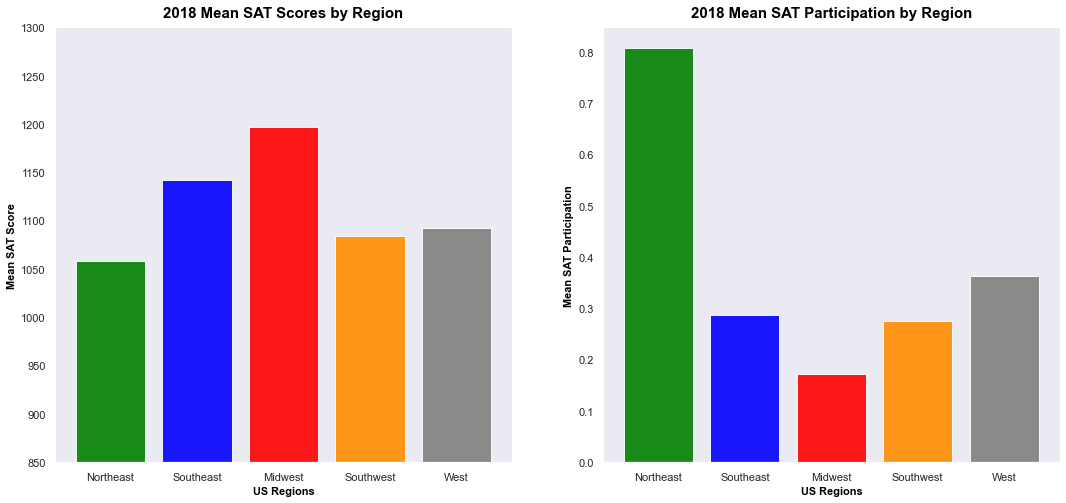

In [557]:
region_means2018 = [northeast_sat['total_2018'].mean(), southeast_sat['total_2018'].mean(), midwest_sat['total_2018'].mean(), southwest_sat['total_2018'].mean(), west_sat['total_2018'].mean()]
region_names2018 = ['Northeast', 'Southeast', 'Midwest', 'Southwest', 'West']
region_part2018 = [northeast_sat['participation_2018'].mean(), southeast_sat['participation_2018'].mean(), midwest_sat['participation_2018'].mean(), southwest_sat['participation_2018'].mean(), west_sat['participation_2018'].mean()]

sns.set_style('dark')


fig, ax = plt.subplots(1,2, figsize=(18, 8), squeeze=False)


ax[0][0].bar(region_names2018, region_means2018,
                color=['green', 'blue', 'red', 'darkorange', 'gray'],
                alpha = 0.90,
            )

ax[0][0].set_xlabel('US Regions',
                    fontdict=dict(fontsize=11,
                    fontweight='bold',
                    color='black'))
ax[0][0].set_ylabel('Mean SAT Score',
                    fontdict=dict(fontsize=11,
                    fontweight='bold',
                    color='black'))
ax[0][0].set_title('2018 Mean SAT Scores by Region',
                    fontdict=dict(fontsize=15,
                    fontweight='bold',
                    color='black'),
                    pad=10)

# ax[0][0].bar_label(ax[0][0].bar(region_names2018, region_means2018,
#                 color='green',
#                 alpha = 0.60) )

ax[0][0].set_ylim(850, 1300)

ax[0][1].bar(region_names, region_part,
                color=['green', 'blue', 'red', 'darkorange', 'gray'],
                alpha = 0.90,
                )

ax[0][1].set_xlabel('US Regions',
                    fontdict=dict(fontsize=11,
                    fontweight='bold',
                    color='black'))
ax[0][1].set_ylabel('Mean SAT Participation',
                    fontdict=dict(fontsize=11,
                    fontweight='bold',
                    color='black'))
ax[0][1].set_title('2018 Mean SAT Participation by Region',
                    fontdict=dict(fontsize=15,
                    fontweight='bold',
                    color='black'),
                    pad=10)
;

''

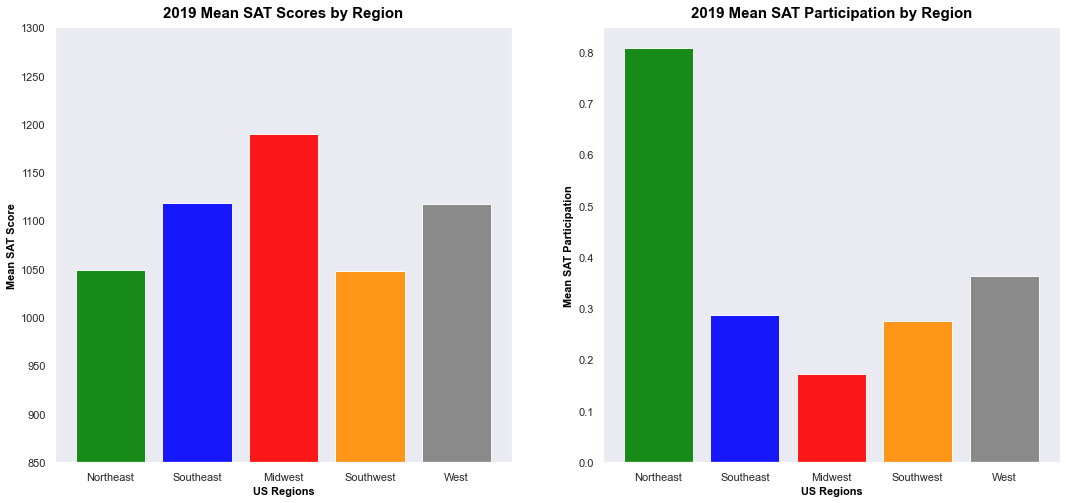

In [559]:
region_means2019 = [northeast_sat['total_2019'].mean(), southeast_sat['total_2019'].mean(), midwest_sat['total_2019'].mean(), southwest_sat['total_2019'].mean(), west_sat['total_2019'].mean()]
region_names2019 = ['Northeast', 'Southeast', 'Midwest', 'Southwest', 'West']
region_part2019 = [northeast_sat['participation_2019'].mean(), southeast_sat['participation_2019'].mean(), midwest_sat['participation_2019'].mean(), southwest_sat['participation_2019'].mean(), west_sat['participation_2019'].mean()]

sns.set_style('dark')


fig, ax = plt.subplots(1,2, figsize=(18, 8), squeeze=False)


ax[0][0].bar(region_names2019, region_means2019,
                color=['green', 'blue', 'red', 'darkorange', 'gray'],
                alpha = 0.90,
            )

ax[0][0].set_xlabel('US Regions',
                    fontdict=dict(fontsize=11,
                    fontweight='bold',
                    color='black'))
ax[0][0].set_ylabel('Mean SAT Score',
                    fontdict=dict(fontsize=11,
                    fontweight='bold',
                    color='black'))
ax[0][0].set_title('2019 Mean SAT Scores by Region',
                    fontdict=dict(fontsize=15,
                    fontweight='bold',
                    color='black'),
                    pad=10)


ax[0][0].set_ylim(850, 1300)

ax[0][1].bar(region_names, region_part,
                color=['green', 'blue', 'red', 'darkorange', 'gray'],
                alpha = 0.90,
                )

ax[0][1].set_xlabel('US Regions',
                    fontdict=dict(fontsize=11,
                    fontweight='bold',
                    color='black'))
ax[0][1].set_ylabel('Mean SAT Participation',
                    fontdict=dict(fontsize=11,
                    fontweight='bold',
                    color='black'))
ax[0][1].set_title('2019 Mean SAT Participation by Region',
                    fontdict=dict(fontsize=15,
                    fontweight='bold',
                    color='black'),
                    pad=10)
;

''

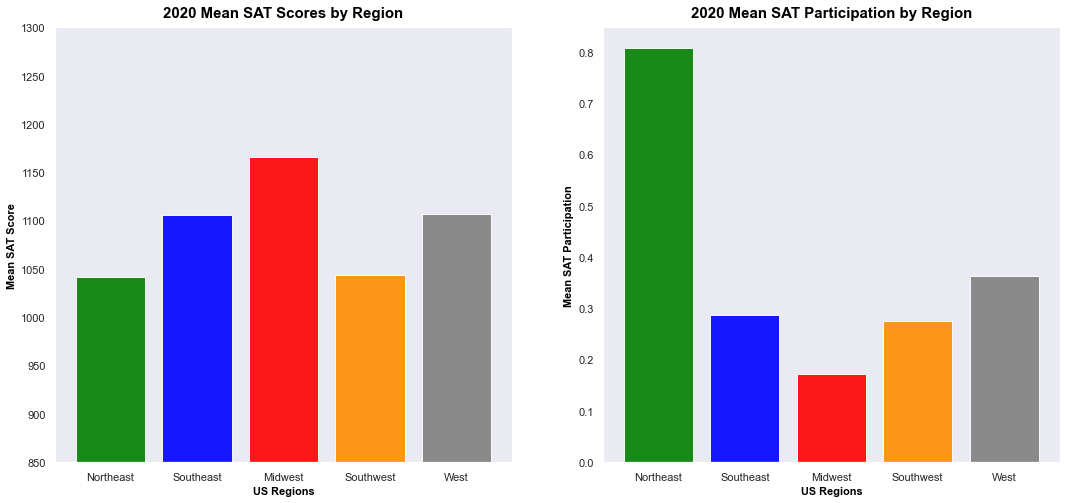

In [562]:
region_means2020 = [northeast_sat['total_2020'].mean(), southeast_sat['total_2020'].mean(), midwest_sat['total_2020'].mean(), southwest_sat['total_2020'].mean(), west_sat['total_2020'].mean()]
region_names2020 = ['Northeast', 'Southeast', 'Midwest', 'Southwest', 'West']
region_part2020 = [northeast_sat['participation_2020'].mean(), southeast_sat['participation_2020'].mean(), midwest_sat['participation_2020'].mean(), southwest_sat['participation_2020'].mean(), west_sat['participation_2020'].mean()]

sns.set_style('dark')


fig, ax = plt.subplots(1,2, figsize=(18, 8), squeeze=False)


ax[0][0].bar(region_names2020, region_means2020,
                color=['green', 'blue', 'red', 'darkorange', 'gray'],
                alpha = 0.90,
            )

ax[0][0].set_xlabel('US Regions',
                    fontdict=dict(fontsize=11,
                    fontweight='bold',
                    color='black'))
ax[0][0].set_ylabel('Mean SAT Score',
                    fontdict=dict(fontsize=11,
                    fontweight='bold',
                    color='black'))
ax[0][0].set_title('2020 Mean SAT Scores by Region',
                    fontdict=dict(fontsize=15,
                    fontweight='bold',
                    color='black'),
                    pad=10)


ax[0][0].set_ylim(850, 1300)

ax[0][1].bar(region_names, region_part,
                color=['green', 'blue', 'red', 'darkorange', 'gray'],
                alpha = 0.90,
                )

ax[0][1].set_xlabel('US Regions',
                    fontdict=dict(fontsize=11,
                    fontweight='bold',
                    color='black'))
ax[0][1].set_ylabel('Mean SAT Participation',
                    fontdict=dict(fontsize=11,
                    fontweight='bold',
                    color='black'))
ax[0][1].set_title('2020 Mean SAT Participation by Region',
                    fontdict=dict(fontsize=15,
                    fontweight='bold',
                    color='black'),
                    pad=10)
;

## Conclusions and Recommendations

#### Given the vague task of "...move the needle on high school education outcomes", I have found that living in a certain region of the United States can have a direct effect on overall SAT scores and rate of participation. It seems in regions that have the greatest participation rate also have the lowest overall SAT scores. We can presume that the schools within states that have made SAT tests mandatory also see overall lower scores. This could be due to the fact that the students might not have been as driven or prepared as effectively as states where the students volunteered to take the tests. This can be seen clearly in the Midwest region across all 4 years where they have the least percentage of participation but the greatest overall scores. The opposite is true with the Northeast region where we see the greatest participation along with the lowest scores in the nation. 

#### One other thing worth noting. The Southeast and Southwest regions had quite similar levels of participation but in all 4 years the Southeast region clearly had overall higher scores than the Southwest. More analysis and outside research is required in order to investigate the correlation. 

#### My recommendation to the mayor of the town is as follows:  
- If you would like to see the greatest overall scores of SAT tests, do not make the test mandatory across schools
- Use available resources to assist students who voluntarily wish to take the tests so that they may be better prepared and achieve a greater overall score, thus improving their chances of getting into the college of their choosing.

### Citations
- https://soflotutors.com/blog/sat-scores-by-state/
- https://www.ducksters.com/geography/us_states/us_geographical_regions.php
- Example readme's within the project folder for readme file inspiration
- Tableau data visualization software for choropleth map